# Matplotlib

The Matplotlib library is a commonly used visualization tool used in Python

Data visualization is an *essential* component of Data Science

Students often underestimate the insights that can come from visualizing data with our own eyes 

Using data visualization we can often identify certain underlying trends and patterns within our data. 
Data visualization is also a very effective way to communicate results to individuals who may not be all that comfortable with certain types of data


____
## Plotting Interfaces

You’ll come across two different interfaces to plotting:
- The MATLAB-style API (Application Programming Interface) 
- The (more formal) Matplotlib Object Oriented API

Well look at some examples of both


In [1]:
# You might need to pip install matplotlib

# pip install matplotlib

### The MATLAB-style API

Here’s the kind of easy example you might find in introductory treatments.

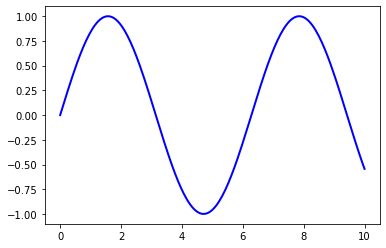

In [2]:
# matlab-style API
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 200)
# Takes the sin of x for all x in the array
y = np.sin(x)

plt.plot(x, y, 'b-', linewidth=2)
plt.show()

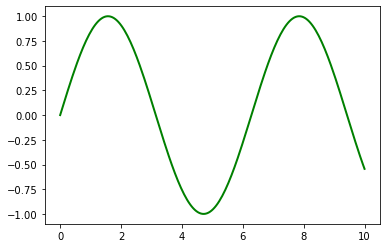

In [3]:
x = np.linspace(0, 10, 200)
# Takes the sin of x for all x in the array
y = np.sin(x)

plt.plot(x, y, 'g-', linewidth=2) #'g-' is green
plt.show()

### The Object-Oriented API

Here’s the code corresponding to the preceding figure using the object-oriented API.

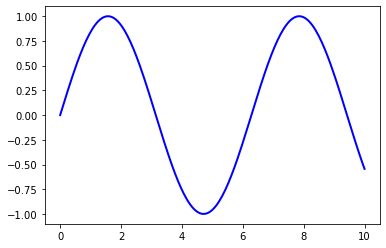

In [4]:
# object-oriented API

fig, ax = plt.subplots()
ax.plot(x,y,'b-',linewidth=2)
plt.show()

Here the call `fig, ax = plt.subplots()` returns a pair, where

- `fig` is a `Figure` instance—like a blank canvas.  
- `ax` is an `AxesSubplot` instance—think of a frame for plotting in.  


The `plot()` function is actually a method of `ax`.

While there’s a bit more typing, the more explicit use of objects gives us better control.

This will become more clear as we go along.

Let's make a few tweaks:

- Change the line to red
- Add a legend.
- Use `alpha` to make the line slightly transparent. This makes it look smoother.

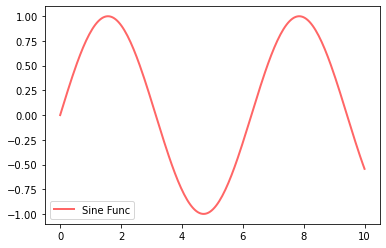

In [5]:
# tweaks p1

fig, ax = plt.subplots()
ax.plot(x,y,'r-',linewidth=2,label='Sine Func',alpha=.6) #alpha is opacity
ax.legend()
plt.show()


The location of the legend can be changed by replacing `ax.legend()` with `ax.legend(loc='upper center')`.

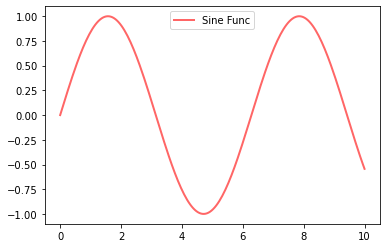

In [6]:
# tweaks p2

fig, ax = plt.subplots()
ax.plot(x,y,'r-',linewidth=2,label='Sine Func',alpha=.6)
ax.legend(loc='upper center')
plt.show()


If everything is properly configured, then adding LaTeX is trivial.

In [7]:
# LaTeX is used to configure text.

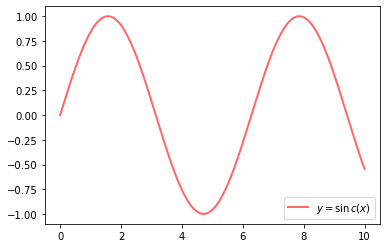

In [8]:
# tweaks p3

fig, ax = plt.subplots()
ax.plot(x,y,'r-',linewidth=2,label='$y=\sinc(x)$',alpha=.6)
ax.legend(loc='lower right')
plt.show()



Controlling the ticks, adding titles and so on is also straightforward.

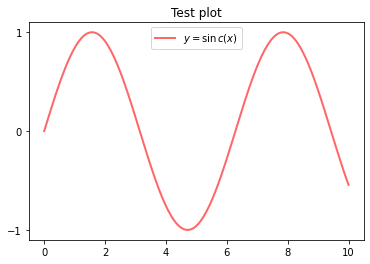

In [9]:
# tweaks p4

fig, ax = plt.subplots()
ax.plot(x,y,'r-',linewidth=2,label='$y=\sinc(x)$',alpha=.6)
ax.legend(loc='upper center')
ax.set_yticks([-1,0,1])
ax.set_title('Test plot')
plt.show()

## More Features

Matplotlib has a huge array of functions and features, which you can discover over time as you have need for them. Here are just a few of them.

### Multiple Plots on One Axis

It’s straightforward to generate multiple plots on the same axes. (Randomly generate 3 normal densities and add a label with their mean.)

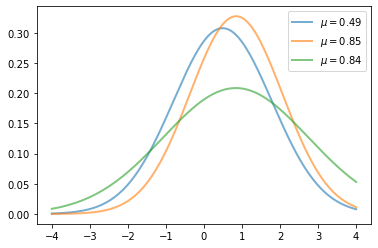

In [10]:
# multiple plots on one axis

from scipy.stats import norm
from random import uniform

fig, ax = plt.subplots()
x = np.linspace(-4,4,150)
for i in range(3):
    m, s = uniform(-1,1), uniform(1,2)
    y = norm.pdf(x,loc=m,scale=s)
    current_label = f'$\mu = {m:.2}$'
    ax.plot(x,y, linewidth=2, alpha=0.6, label = current_label)
ax.legend()
plt.show()

### Multiple Subplots

Sometimes we want multiple subplots in one figure. Here’s an example that generates 6 histograms

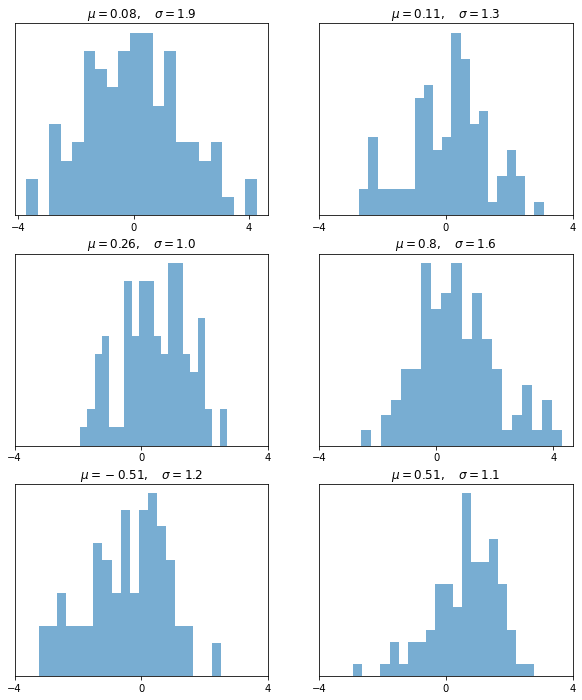

In [11]:
# multiple subplots

num_rows, num_cols = 3,2
fig, axes = plt.subplots(num_rows,num_cols,figsize=(10,12))
for i in range(num_rows):
    for j in range(num_cols):
        m, s = uniform(-1,1), uniform(1,2)
        x = norm.rvs(loc=m,scale=s,size=100)
        axes[i,j].hist(x,alpha=0.6,bins=20)
        t = f'$\mu = {m:.2}, \quad \sigma = {s:.2}$'
        axes[i, j].set(title=t, xticks=[-4,0,4],yticks=[])

plt.show()


### 3D Plots


<a id='index-5'></a>
Matplotlib does a nice job of 3D plots — here is one example.


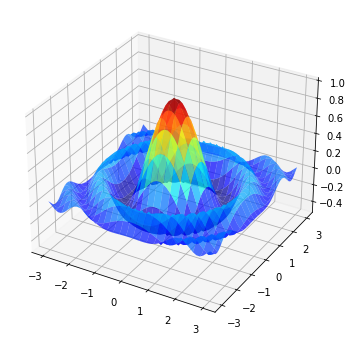

In [12]:
# 3d plots

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm


def f(x,y):
    return np.cos(x**2 + y**2) / (1+ x**2 + y**2)

xgrid = np.linspace(-3,3,50)
ygrid = xgrid
x,y = np.meshgrid(xgrid,ygrid)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(x,y,f(x,y),rstride=2,cstride=2,cmap=cm.jet,alpha=0.7,linewidth=0.25)
ax.set_zlim(-0.5,1)
plt.show()

### A Customizing Function

Perhaps you will find a set of customizations that you regularly use.

Suppose we usually prefer our axes to go through the origin, and to have a grid.

Here’s a nice example from [Matthew Doty](https://github.com/xcthulhu) of how the object-oriented API can be used to build a custom `subplots` function that implements these changes.

Read carefully through the code and see if you can follow what’s going on.

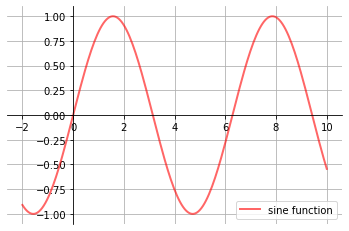

In [13]:
# Take 10 minutes to read through the code. What's going on?
def subplots():
    "Custom subplots with axes through the origin"
    fig, ax = plt.subplots()

    # Set the axes through the origin
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')

    ax.grid()
    return fig, ax


fig, ax = subplots()  # Call the local version, not plt.subplots()
x = np.linspace(-2, 10, 200)
y = np.sin(x)
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend(loc='lower right')
plt.show()

The custom `subplots` function

1. calls the standard `plt.subplots` function internally to generate the `fig, ax` pair,  
1. makes the desired customizations to `ax`, and  
1. passes the `fig, ax` pair back to the calling code. 

## Matplotlib Styles: 


In [14]:
import numpy as np  
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sorted(mpl.style.available)

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [15]:
# matplotlib styles p1

def dogplot():
    fig,ax = plt.subplots(1,1,figsize=(5,5))
    t = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
    x = np.linspace(0,14,100)
    for i in range(1,7):
        ax.plot(x, np.sin(x + i * .5) * (7 -i))
    return ax

<AxesSubplot:>

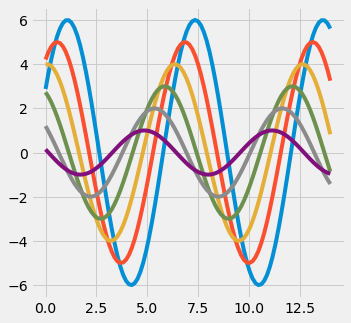

In [16]:
# matplotlib styles p2
mpl.style.use('fivethirtyeight')
dogplot()

### Quick glance at seaborn: a useful statistical plot package

In [17]:
# seaborn example p1
import seaborn as sns

tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


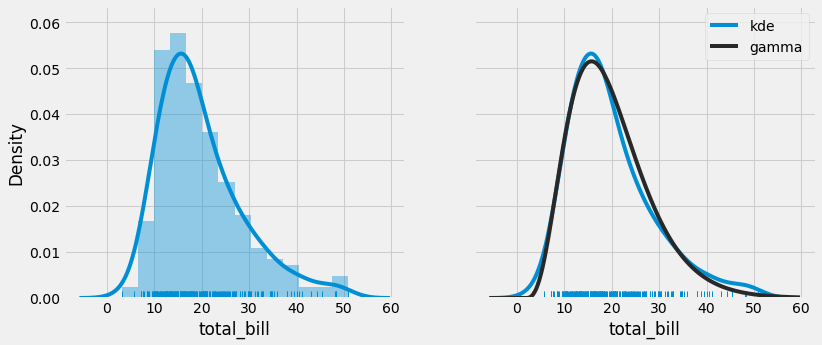

In [18]:
# seaborn example p2
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import warnings
warnings.simplefilter('ignore')

# We create two subplots sharing the same y axis.
f, (ax1, ax2) = plt.subplots(1 ,2,figsize=(12,5),sharey=True)

# Left subplot.
# Histogram and KDE (active by default).
sns.distplot(tips.total_bill,ax=ax1,hist=True,rug=True)


# Right subplot.
# "Rugplot", KDE, and gamma fit.
#kde_kws - keyword args for kdeplot()
#fit_kws -keywords for the fit which is a stats.gamma

sns.distplot(tips.total_bill,
             ax=ax2,
             hist=False,
             kde=True,
             rug=True,
             fit=stats.gamma,
             fit_kws={'label':'gamma'},
             kde_kws=dict(label='kde')
            )

ax2.legend();

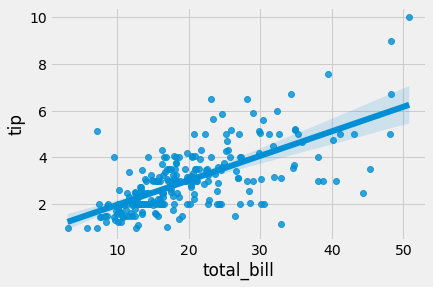

In [19]:
# seaborn example p3

sns.regplot(x='total_bill',y='tip',data=tips);

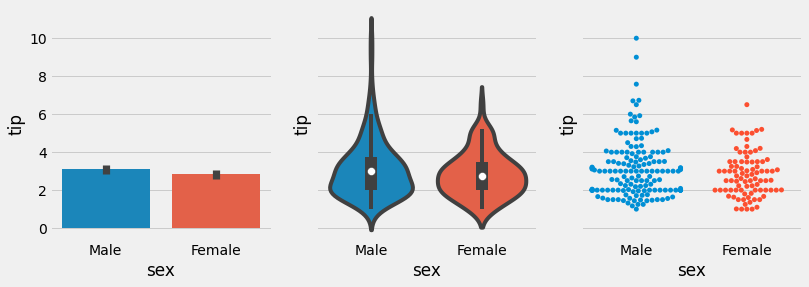

In [20]:
# seaborn example p4

f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,4),sharey=True)
sns.barplot(x='sex',y='tip',data=tips,ax=ax1)
sns.violinplot(x='sex',y='tip',data=tips,ax=ax2)
sns.swarmplot(x='sex',y='tip',data=tips,ax=ax3)
plt.show()


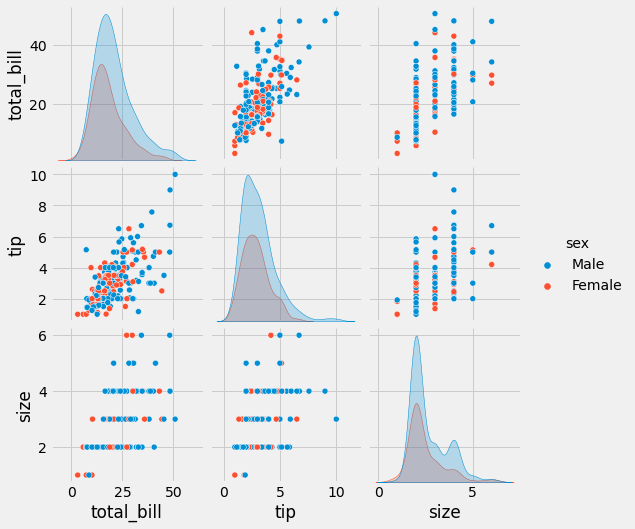

In [21]:
# seaborn example p5

sns.pairplot(tips,hue='sex');
